In [4]:
import scSherlock as sh
import scanpy as sc
import warnings
warnings.filterwarnings('ignore')

# Reed atlas

In [57]:
# Load the data
adata = sc.read_h5ad("/home/croizer/Downloads/TabulaSapiens.h5ad/TabulaSapiens.h5ad")
cell_type_column = "level2"
patient_column = "donor"


In [59]:

adata.X = adata.layers['raw_counts']

In [62]:
adata

AnnData object with n_obs × n_vars = 481120 × 58870
    obs: 'organ_tissue', 'method', 'donor', 'anatomical_information', 'n_counts_UMIs', 'n_genes', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'gender'
    var: 'gene_symbol', 'feature_type', 'ensemblid', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: '_scvi', '_training_mode', 'compartment_colors', 'dendrogram_cell_type_tissue', 'dendrogram_computational_compartment_assignment', 'dendrogram_consensus_prediction', 'dendrogram_tissue_cell_type', 'donor_colors', 'donor_method_colors', 'hvg', 'method_colors', 'neighbors', 'sex_colors', 'tissue_colors', 'umap'
    obsm: 'X_pca', 'X_scvi', 'X_scvi_umap', 'X_umap'
    layers: 'decontXcounts', 'raw_counts'
    obsp: 'connectivities', 'distances'

In [ ]:
adata.obs


,organ_tissue,method,donor,anatomical_information,n_counts_UMIs,n_genes,cell_ontology_class,free_annotation,manually_annotated,compartment,gender
cell_id,,,,,,,,,,,
AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1,Liver,10X,TSP6,nan,7633.0,2259,macrophage,Monocyte/Macrophage,True,immune,male
AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1,Liver,10X,TSP6,nan,2858.0,1152,monocyte,Monocyte,True,immune,male
AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1,Liver,10X,TSP6,nan,7787.0,2983,endothelial cell of hepatic sinusoid,Endothelial,True,endothelial,male
AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1,Liver,10X,TSP6,nan,10395.0,2598,macrophage,Monocyte/Macrophage,True,immune,male
AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1,Liver,10X,TSP6,nan,6610.0,2125,liver dendritic cell,Dendritic cell,True,immune,male
...,...,...,...,...,...,...,...,...,...,...,...
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P4_S364,Vasculature,smartseq2,TSP2,aorta,13205.0,579,endothelial cell,endothelial cell,True,endothelial,female
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P5_S365,Vasculature,smartseq2,TSP2,aorta,9565.0,529,endothelial cell,endothelial cell,True,endothelial,female
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P7_S367,Vasculature,smartseq2,TSP2,aorta,195639.0,2753,endothelial cell,endothelial cell,True,endothelial,female


In [63]:
# Create configuration
config = sh.ScSherlockConfig(
    k_values=[1, 10, 25],
    scoring_method=sh.ScoringMethod.DIFF,
    aggregation_method=sh.AggregationMethod.MEAN,
    max_genes_kept=100,
    min_patients=3,
    min_reads=10,
    sparse_step=5,
    n_jobs=-1
)

# Initialize SCherlock
scherlock = sh.ScSherlock(
    adata=adata,
    column_patient="donor",
    config=config
)

2025-04-25 16:37:33,460 - ScSherlock - INFO - ScSherlock initialized with (481120, 58870) data matrix


In [5]:
scherlock.run(column_ctype="cell_type", method='empiric', bootstrap=True)

2025-04-22 14:44:51,962 - ScSherlock - INFO - Calculating theoretical scores for cell_type...
Aggregating Samples: 100%|██████████| 4914/4914 [00:02<00:00, 1767.33it/s]
2025-04-22 14:45:30,480 - ScSherlock - INFO - Completed theoretical score calculation
2025-04-22 14:45:30,481 - ScSherlock - INFO - Applying multi-category correction...
2025-04-22 14:45:30,593 - ScSherlock - INFO - Aggregating scores...
2025-04-22 14:45:30,696 - ScSherlock - INFO - Sorting scores...
2025-04-22 14:45:31,162 - ScSherlock - INFO - Filtering genes...
Aggregating Samples: 100%|██████████| 4914/4914 [00:02<00:00, 1756.66it/s]


0       cell_type::CD4-positive helper T cell--donor_i...
1       cell_type::CD4-positive helper T cell--donor_i...
2       cell_type::CD4-positive helper T cell--donor_i...
3       cell_type::CD4-positive helper T cell--donor_i...
4       cell_type::CD4-positive helper T cell--donor_i...
                              ...                        
4173    cell_type::vein endothelial cell--donor_id_sim...
4174    cell_type::vein endothelial cell--donor_id_sim...
4175    cell_type::vein endothelial cell--donor_id_sim...
4176    cell_type::vein endothelial cell--donor_id_sim...
4177    cell_type::vein endothelial cell--donor_id_sim...
Name: SampleName, Length: 4178, dtype: object


Aggregating Samples: 100%|██████████| 39/39 [00:03<00:00, 12.33it/s]


Cell types in sorted_table: dict_keys(['luminal epithelial cell of mammary gland', 'mammary gland epithelial cell', 'basal cell', 'naive B cell', 'class switched memory B cell', 'IgG plasma cell', 'IgA plasma cell', 'unswitched memory B cell', 'mature NK T cell', 'effector memory CD8-positive, alpha-beta T cell', 'CD4-positive, alpha-beta T cell', 'gamma-delta T cell', 'CD4-positive helper T cell', 'regulatory T cell', 'CD8-positive, alpha-beta memory T cell', 'natural killer cell', 'lymphocyte', 'activated CD4-positive, alpha-beta T cell', 'effector memory CD4-positive, alpha-beta T cell', 'activated CD8-positive, alpha-beta T cell', 'T cell', 'macrophage', 'classical monocyte', 'myeloid dendritic cell', 'non-classical monocyte', 'conventional dendritic cell', 'alternatively activated macrophage', 'inflammatory macrophage', 'myeloid cell', 'plasmacytoid dendritic cell', 'neutrophil', 'fibroblast', 'endothelial cell of lymphatic vessel', 'capillary endothelial cell', 'vein endothelial 

2025-04-22 14:45:40,384 - ScSherlock - INFO - Calculating empirical scores...
2025-04-22 14:47:21,592 - ScSherlock - INFO - Aggregating empirical scores...
2025-04-22 14:47:21,599 - ScSherlock - INFO - Sorting empirical scores...
2025-04-22 14:47:22,132 - ScSherlock - INFO - Performing bootstrap validation...
2025-04-22 14:47:22,187 - ScSherlock - INFO - Starting bootstrap validation of markers...
2025-04-22 14:47:22,188 - ScSherlock - INFO - Found 1818 potential marker genes for bootstrap validation
2025-04-22 14:47:43,722 - ScSherlock - INFO - Created two balanced subsets: 373266 and 341065 cells
2025-04-22 14:47:43,730 - ScSherlock - INFO - Initializing ScSherlock for subset 1...
2025-04-22 14:47:43,739 - ScSherlock - INFO - ScSherlock initialized with (373266, 1818) data matrix
2025-04-22 14:47:43,739 - ScSherlock - INFO - Initializing ScSherlock for subset 2...
2025-04-22 14:47:43,742 - ScSherlock - INFO - ScSherlock initialized with (341065, 1818) data matrix
2025-04-22 14:47:43,

0       cell_type::CD4-positive helper T cell--donor_i...
1       cell_type::CD4-positive helper T cell--donor_i...
2       cell_type::CD4-positive helper T cell--donor_i...
3       cell_type::CD4-positive helper T cell--donor_i...
4       cell_type::CD4-positive helper T cell--donor_i...
                              ...                        
2061    cell_type::vein endothelial cell--donor_id_sim...
2062    cell_type::vein endothelial cell--donor_id_sim...
2063    cell_type::vein endothelial cell--donor_id_sim...
2064    cell_type::vein endothelial cell--donor_id_sim...
2065    cell_type::vein endothelial cell--donor_id_sim...
Name: SampleName, Length: 2066, dtype: object


Aggregating Samples: 100%|██████████| 39/39 [00:00<00:00, 1050.27it/s]

Cell types in sorted_table: dict_keys(['luminal epithelial cell of mammary gland', 'mammary gland epithelial cell', 'basal cell', 'naive B cell', 'class switched memory B cell', 'IgG plasma cell', 'IgA plasma cell', 'unswitched memory B cell', 'mature NK T cell', 'effector memory CD8-positive, alpha-beta T cell', 'gamma-delta T cell', 'CD4-positive helper T cell', 'CD4-positive, alpha-beta T cell', 'CD8-positive, alpha-beta memory T cell', 'natural killer cell', 'lymphocyte', 'activated CD4-positive, alpha-beta T cell', 'regulatory T cell', 'activated CD8-positive, alpha-beta T cell', 'effector memory CD4-positive, alpha-beta T cell', 'T cell', 'macrophage', 'classical monocyte', 'myeloid dendritic cell', 'non-classical monocyte', 'conventional dendritic cell', 'alternatively activated macrophage', 'inflammatory macrophage', 'myeloid cell', 'plasmacytoid dendritic cell', 'fibroblast', 'endothelial cell of lymphatic vessel', 'capillary endothelial cell', 'vein endothelial cell', 'endoth


2025-04-22 14:48:11,028 - ScSherlock - INFO - Calculating empirical scores...
2025-04-22 14:49:21,772 - ScSherlock - INFO - Aggregating empirical scores...
2025-04-22 14:49:21,778 - ScSherlock - INFO - Sorting empirical scores...
2025-04-22 14:49:22,291 - ScSherlock - INFO - Identifying top markers...
2025-04-22 14:49:22,296 - ScSherlock - INFO - ScSherlock completed. Found markers for 24/39 cell types
2025-04-22 14:49:22,296 - ScSherlock - INFO - Computing empirical scores on subset 2...
2025-04-22 14:49:22,763 - ScSherlock - INFO - Calculating theoretical scores for cell_type...
Aggregating Samples: 100%|██████████| 2457/2457 [00:00<00:00, 10778.20it/s]
2025-04-22 14:49:31,439 - ScSherlock - INFO - Completed theoretical score calculation
2025-04-22 14:49:31,440 - ScSherlock - INFO - Applying multi-category correction...
2025-04-22 14:49:31,454 - ScSherlock - INFO - Aggregating scores...
2025-04-22 14:49:31,467 - ScSherlock - INFO - Sorting scores...
2025-04-22 14:49:31,687 - ScSherl

0       cell_type::CD4-positive helper T cell--donor_i...
1       cell_type::CD4-positive helper T cell--donor_i...
2       cell_type::CD4-positive helper T cell--donor_i...
3       cell_type::CD4-positive helper T cell--donor_i...
4       cell_type::CD4-positive helper T cell--donor_i...
                              ...                        
2107    cell_type::vein endothelial cell--donor_id_sim...
2108    cell_type::vein endothelial cell--donor_id_sim...
2109    cell_type::vein endothelial cell--donor_id_sim...
2110    cell_type::vein endothelial cell--donor_id_sim...
2111    cell_type::vein endothelial cell--donor_id_sim...
Name: SampleName, Length: 2112, dtype: object


Aggregating Samples: 100%|██████████| 39/39 [00:00<00:00, 1137.05it/s]

Cell types in sorted_table: dict_keys(['luminal epithelial cell of mammary gland', 'mammary gland epithelial cell', 'basal cell', 'IgA plasma cell', 'class switched memory B cell', 'naive B cell', 'IgG plasma cell', 'mature NK T cell', 'effector memory CD8-positive, alpha-beta T cell', 'CD4-positive, alpha-beta T cell', 'CD4-positive helper T cell', 'regulatory T cell', 'CD8-positive, alpha-beta memory T cell', 'natural killer cell', 'lymphocyte', 'effector memory CD4-positive, alpha-beta T cell', 'gamma-delta T cell', 'T cell', 'non-classical monocyte', 'classical monocyte', 'conventional dendritic cell', 'inflammatory macrophage', 'alternatively activated macrophage', 'myeloid cell', 'macrophage', 'myeloid dendritic cell', 'plasmacytoid dendritic cell', 'neutrophil', 'fibroblast', 'endothelial cell of lymphatic vessel', 'vein endothelial cell', 'capillary endothelial cell', 'endothelial cell of artery', 'pericyte', 'vascular associated smooth muscle cell', 'unswitched memory B cell',


2025-04-22 14:49:33,364 - ScSherlock - INFO - Calculating empirical scores...
2025-04-22 14:50:42,887 - ScSherlock - INFO - Aggregating empirical scores...
2025-04-22 14:50:42,893 - ScSherlock - INFO - Sorting empirical scores...
2025-04-22 14:50:43,408 - ScSherlock - INFO - Identifying top markers...
2025-04-22 14:50:43,409 - ScSherlock - INFO - ScSherlock completed. Found markers for 23/39 cell types
2025-04-22 14:50:43,414 - ScSherlock - INFO - Marker ANKRD30A for luminal epithelial cell of mammary gland: PASSED bootstrap validation (original: 1.000, subset1: 1.0, subset2: 1.0)
2025-04-22 14:50:43,415 - ScSherlock - INFO - Marker AGR2 for luminal epithelial cell of mammary gland: PASSED bootstrap validation (original: 1.000, subset1: 0.9996612466124661, subset2: 1.0)
2025-04-22 14:50:43,415 - ScSherlock - INFO - Marker AGR3 for luminal epithelial cell of mammary gland: PASSED bootstrap validation (original: 1.000, subset1: 1.0, subset2: 1.0)
2025-04-22 14:50:43,416 - ScSherlock - I

{'luminal epithelial cell of mammary gland': 'ANKRD30A',
 'mammary gland epithelial cell': 'CA3',
 'basal cell': 'COL17A1',
 'naive B cell': 'TCL1A',
 'IgG plasma cell': 'IGHGP',
 'IgA plasma cell': 'GPRC5D',
 'regulatory T cell': 'FOXP3',
 'natural killer cell': 'KIR2DL1',
 'T cell': 'SPC25',
 'macrophage': 'CHIT1',
 'classical monocyte': 'SERPINB2',
 'myeloid dendritic cell': 'TNNT2',
 'non-classical monocyte': 'LYPD2',
 'conventional dendritic cell': 'PPY',
 'inflammatory macrophage': 'ANKRD66',
 'neutrophil': 'CYP4F3',
 'fibroblast': 'LUM',
 'endothelial cell of lymphatic vessel': 'ENSG00000250626.3',
 'capillary endothelial cell': 'GALR1',
 'vein endothelial cell': 'PTPN5',
 'endothelial cell of artery': 'ENSG00000233760.3',
 'pericyte': 'DMRT3',
 'vascular associated smooth muscle cell': 'RERGL',
 'mast cell': 'CMA1'}

In [64]:
annotation = ['organ_tissue', "cell_ontology_class", 'free_annotation']
scherlock.create_hierarchy_graph(annotation,  min_proportion=0.03)
fig = scherlock.visualize_hierarchy()

KeyboardInterrupt: 

In [7]:
scherlock.adata.obs

,sampleID,sample_type_coarse,sample_type,processing_date,dissociation_minutes,parity,brca_status,condition,tissue_condition,reported_ethnicity,...,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid,donor_id_simplified
cellID,,,,,,,,,,,,,,,,,,,,,
CGTCAAAAGACGTCGA-SLX-19902-20449_SIGAA3,SLX-19902-20449_SIGAA3,Stroma enriched,Stroma enriched - unsorted,2020-10-07,7,2,BRCA1,contralateral,Contralateral BRCA1,White-Any_other_background,...,endothelial cell of lymphatic vessel,10x 3' v3,normal,Homo sapiens,female,breast,European,38-year-old stage,dO*l<a`uXe,P1
CACGGGTAGATTGAGT-SLX-19864_SIGAB5,SLX-19864_SIGAB5,Epithelial enriched - LASP-sorted,Epithelial enriched - LASP-sorted,2020-10-27,10,2,BRCA1,contralateral,Contralateral BRCA1,White-British,...,luminal adaptive secretory precursor cell of m...,10x 3' v3,normal,Homo sapiens,female,breast,British,36-year-old stage,5GVUQEaaQ&,P2
CTTAGGATCGATCCCT-SLX-19902-20449_SIGAB3,SLX-19902-20449_SIGAB3,Stroma enriched,Stroma enriched - unsorted,2020-10-07,7,2,BRCA1,prophylactic_mastectomy,Mastectomy BRCA1,White-British,...,fibroblast of mammary gland,10x 3' v3,normal,Homo sapiens,female,breast,British,38-year-old stage,(LG;+3R6<R,P3
TCACTCGCAAATACGA-SLX-20261_SIGAA3,SLX-20261_SIGAA3,Epithelial enriched,Epithelial enriched - unsorted,2021-01-26,10,0,BRCA2,prophylactic_mastectomy,Mastectomy BRCA2,White-British,...,luminal hormone-sensing cell of mammary gland,10x 3' v3,normal,Homo sapiens,female,breast,British,39-year-old stage,^lSJNe)0v^,P4
TCATGAGAGGGAGTGG-SLX-19902-20449_SIGAA3,SLX-19902-20449_SIGAA3,Stroma enriched,Stroma enriched - unsorted,2020-10-07,7,2,BRCA1,contralateral,Contralateral BRCA1,White-Any_other_background,...,blood vessel endothelial cell,10x 3' v3,normal,Homo sapiens,female,breast,European,38-year-old stage,q3L|MZ?}|L,P1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GAGATGGAGCGGACAT-SLX-20005-20446_SIGAB6,SLX-20005-20446_SIGAB6,Stroma enriched,Stroma enriched - unsorted,2020-12-02,5,2,WT,prophylactic_mastectomy,Mastectomy WT,White-British,...,luminal hormone-sensing cell of mammary gland,10x 3' v3,normal,Homo sapiens,female,breast,British,30-year-old stage,GuerV-c#A$,P6
AGGACGAAGTAAAGCT-SLX-20870_SIGAA9,SLX-20870_SIGAA9,Stroma enriched,Stroma enriched - unsorted,2021-06-02,7,0,BRCA1,prophylactic_mastectomy,Mastectomy BRCA1,NaN,...,perivascular cell,10x 3' v3,normal,Homo sapiens,female,breast,unknown,31-year-old stage,^fF%D+Uk%L,P31
CTGAATGTCGCTACGG-SLX-20005_SIGAH12,SLX-20005_SIGAH12,Epithelial enriched - LASP-sorted,Epithelial enriched - LASP-sorted,2020-11-12,10,unknown,assume_WT,reduction_mammoplasty,Mammoplasty WT,Black_or_Black_British-Any_other_Black_background,...,luminal adaptive secretory precursor cell of m...,10x 3' v3,normal,Homo sapiens,female,breast,African,33-year-old stage,F;X^-bX{>*,P37


2025-04-25 14:27:24,209 - ScSherlock - INFO - Creating unsupervised hierarchy based on cell_type with max depth 2
2025-04-25 14:27:24,209 - ScSherlock - INFO - Creating pseudobulk profiles...
Aggregating Samples: 100%|██████████| 39/39 [00:03<00:00, 11.72it/s]
2025-04-25 14:27:27,812 - ScSherlock - INFO - Performing hierarchical clustering using ward linkage and correlation distance...
2025-04-25 14:27:27,873 - ScSherlock - INFO - Extracting hierarchical structure from dendrogram...
2025-04-25 14:27:27,874 - ScSherlock - INFO - Number of clusters by depth: {1: 4, 2: 8}
2025-04-25 14:27:27,874 - ScSherlock - INFO - Depth 1: 4 unique clusters (target: 4)
2025-04-25 14:27:27,875 - ScSherlock - INFO - Depth 2: 8 unique clusters (target: 8)
2025-04-25 14:27:27,902 - ScSherlock - INFO - Added column cell_type_depth1 to AnnData.obs
2025-04-25 14:27:27,929 - ScSherlock - INFO - Added column cell_type_depth2 to AnnData.obs
2025-04-25 14:27:27,929 - ScSherlock - INFO - Building networkx graph fr

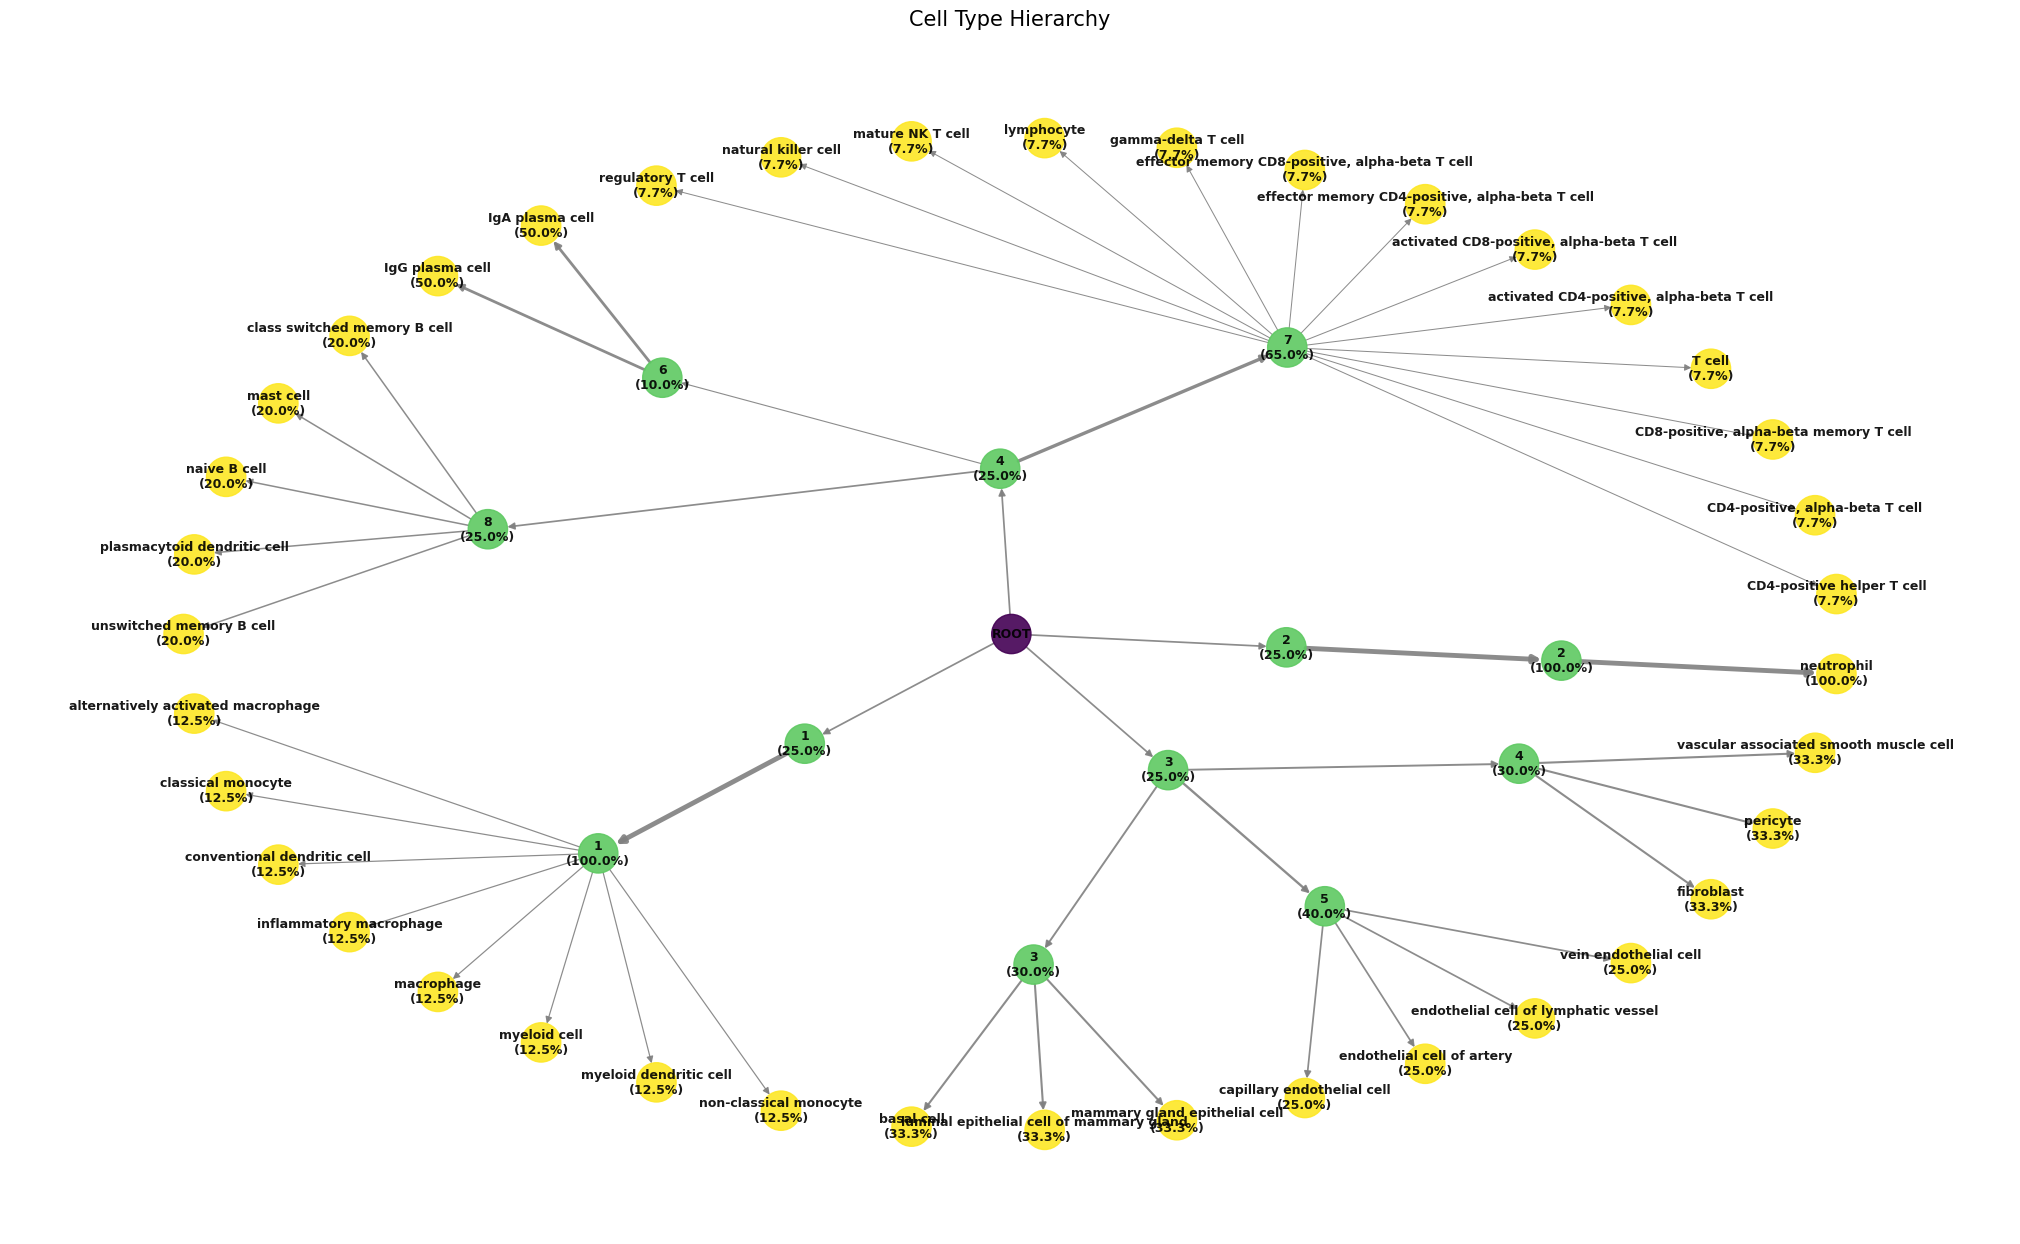

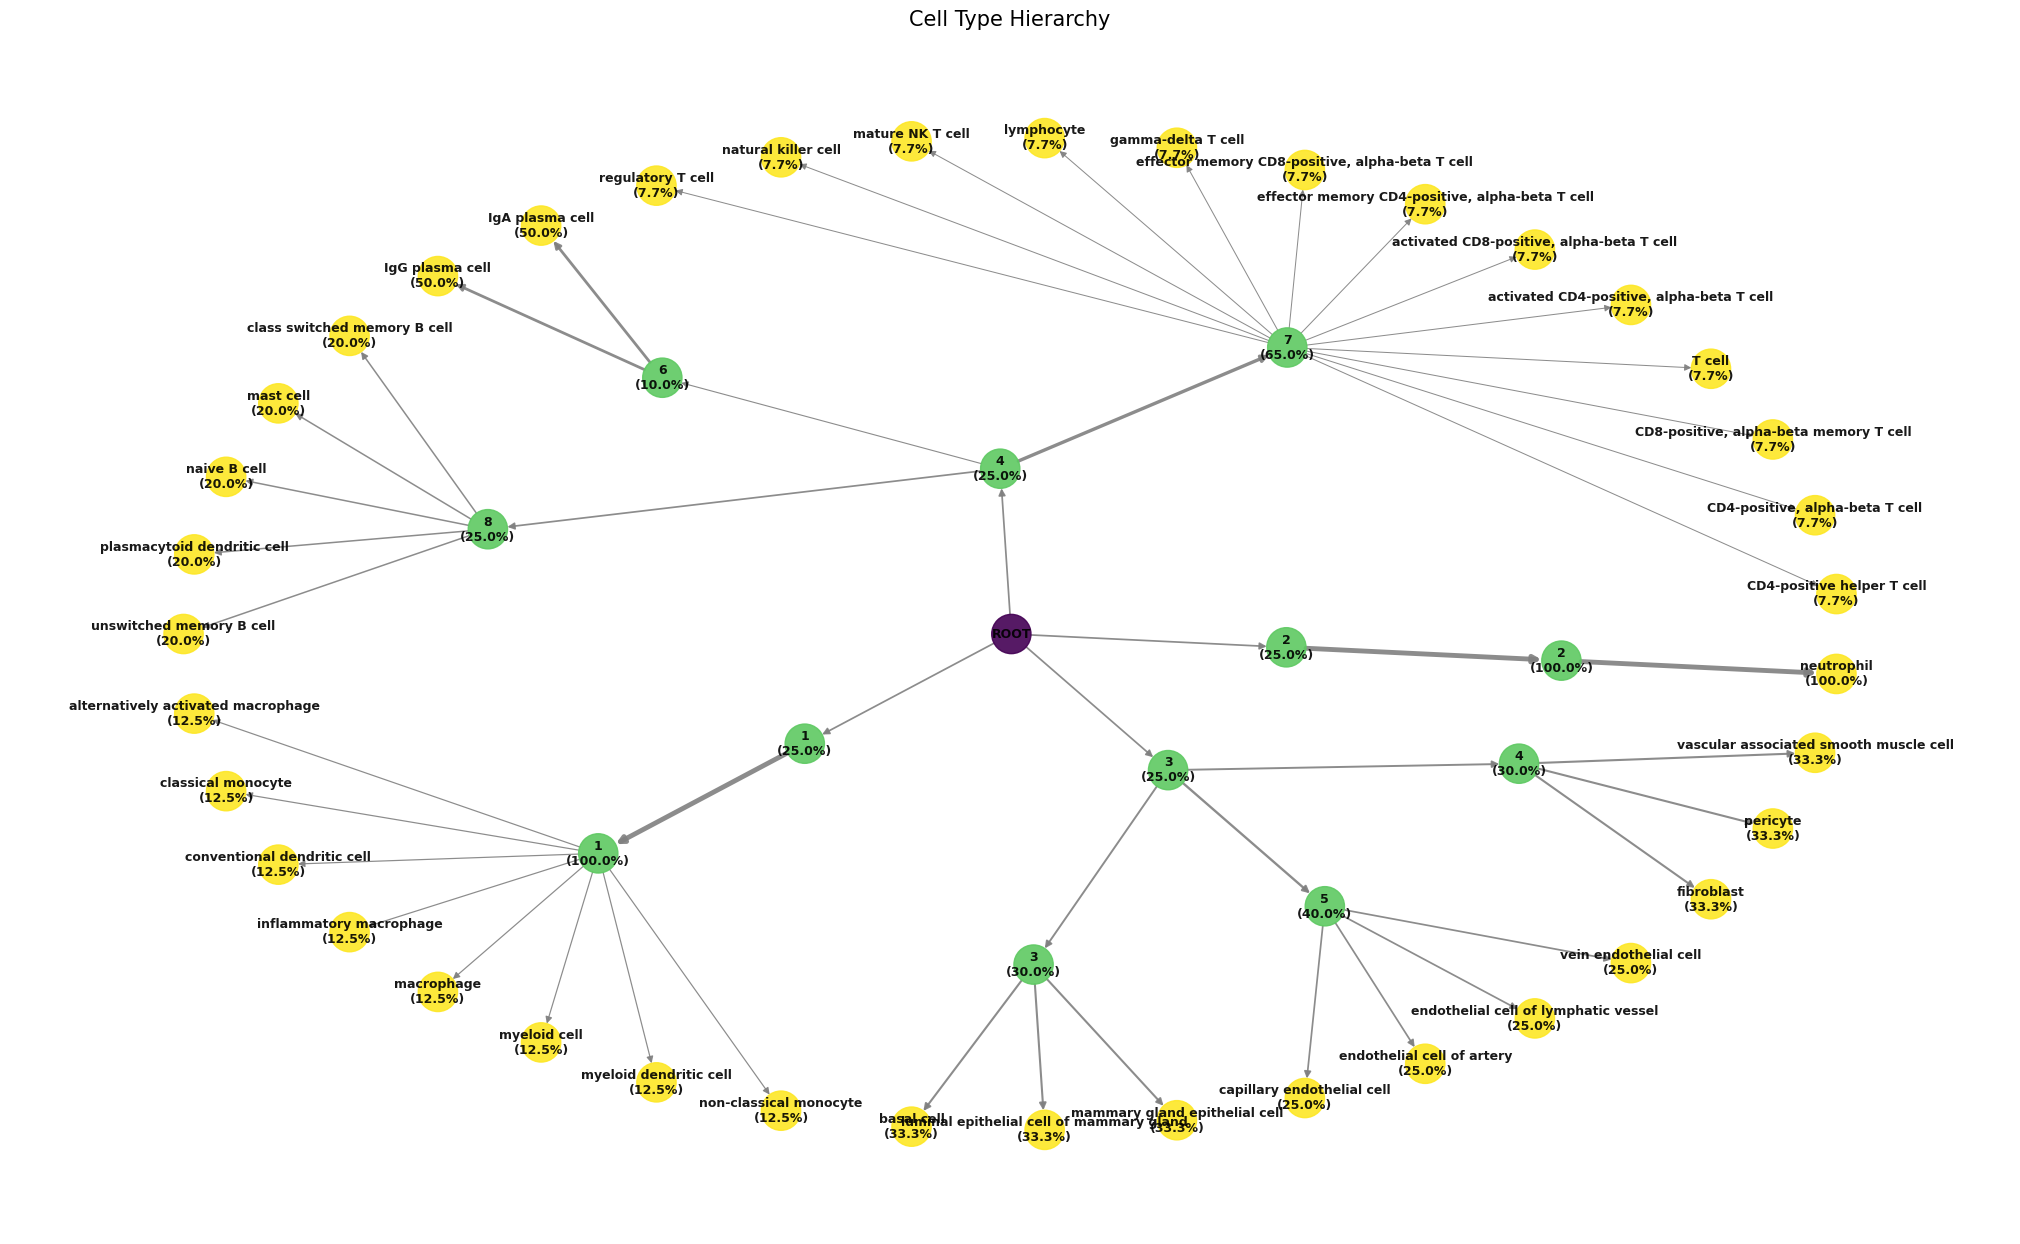

In [25]:
scherlock.create_hierarchy_graph_unsupervised("cell_type", max_depth=2)
scherlock.visualize_hierarchy("curated_finest",  
                               figsize=(20, 12))

In [54]:
for annot in annotation:
    scherlock.run(column_ctype=annot,method='empiric')


2025-04-25 16:27:20,938 - ScSherlock - INFO - Calculating theoretical scores for compartment...
Aggregating Samples: 100%|██████████| 3/3 [00:00<00:00, 18.31it/s]
2025-04-25 16:27:24,097 - ScSherlock - INFO - Completed theoretical score calculation
2025-04-25 16:27:24,098 - ScSherlock - INFO - Applying multi-category correction...
2025-04-25 16:27:24,109 - ScSherlock - INFO - Aggregating scores...
2025-04-25 16:27:24,121 - ScSherlock - INFO - Sorting scores...
2025-04-25 16:27:24,140 - ScSherlock - INFO - Filtering genes...
Aggregating Samples: 100%|██████████| 3/3 [00:00<00:00, 22.64it/s]
2025-04-25 16:27:24,471 - ScSherlock - INFO - Calculating empirical scores...
2025-04-25 16:27:25,054 - ScSherlock - INFO - Aggregating empirical scores...
2025-04-25 16:27:25,055 - ScSherlock - INFO - Sorting empirical scores...
2025-04-25 16:27:25,056 - ScSherlock - INFO - Identifying top markers...
2025-04-25 16:27:25,056 - ScSherlock - INFO - ScSherlock completed. Found markers for 0/3 cell types

2025-04-25 16:27:46,386 - ScSherlock - INFO - Found empirical marker scores for compartment
2025-04-25 16:27:46,386 - ScSherlock - INFO - Found empirical marker scores for broad_cell_class
2025-04-25 16:27:46,386 - ScSherlock - INFO - Found empirical marker scores for free_annotation


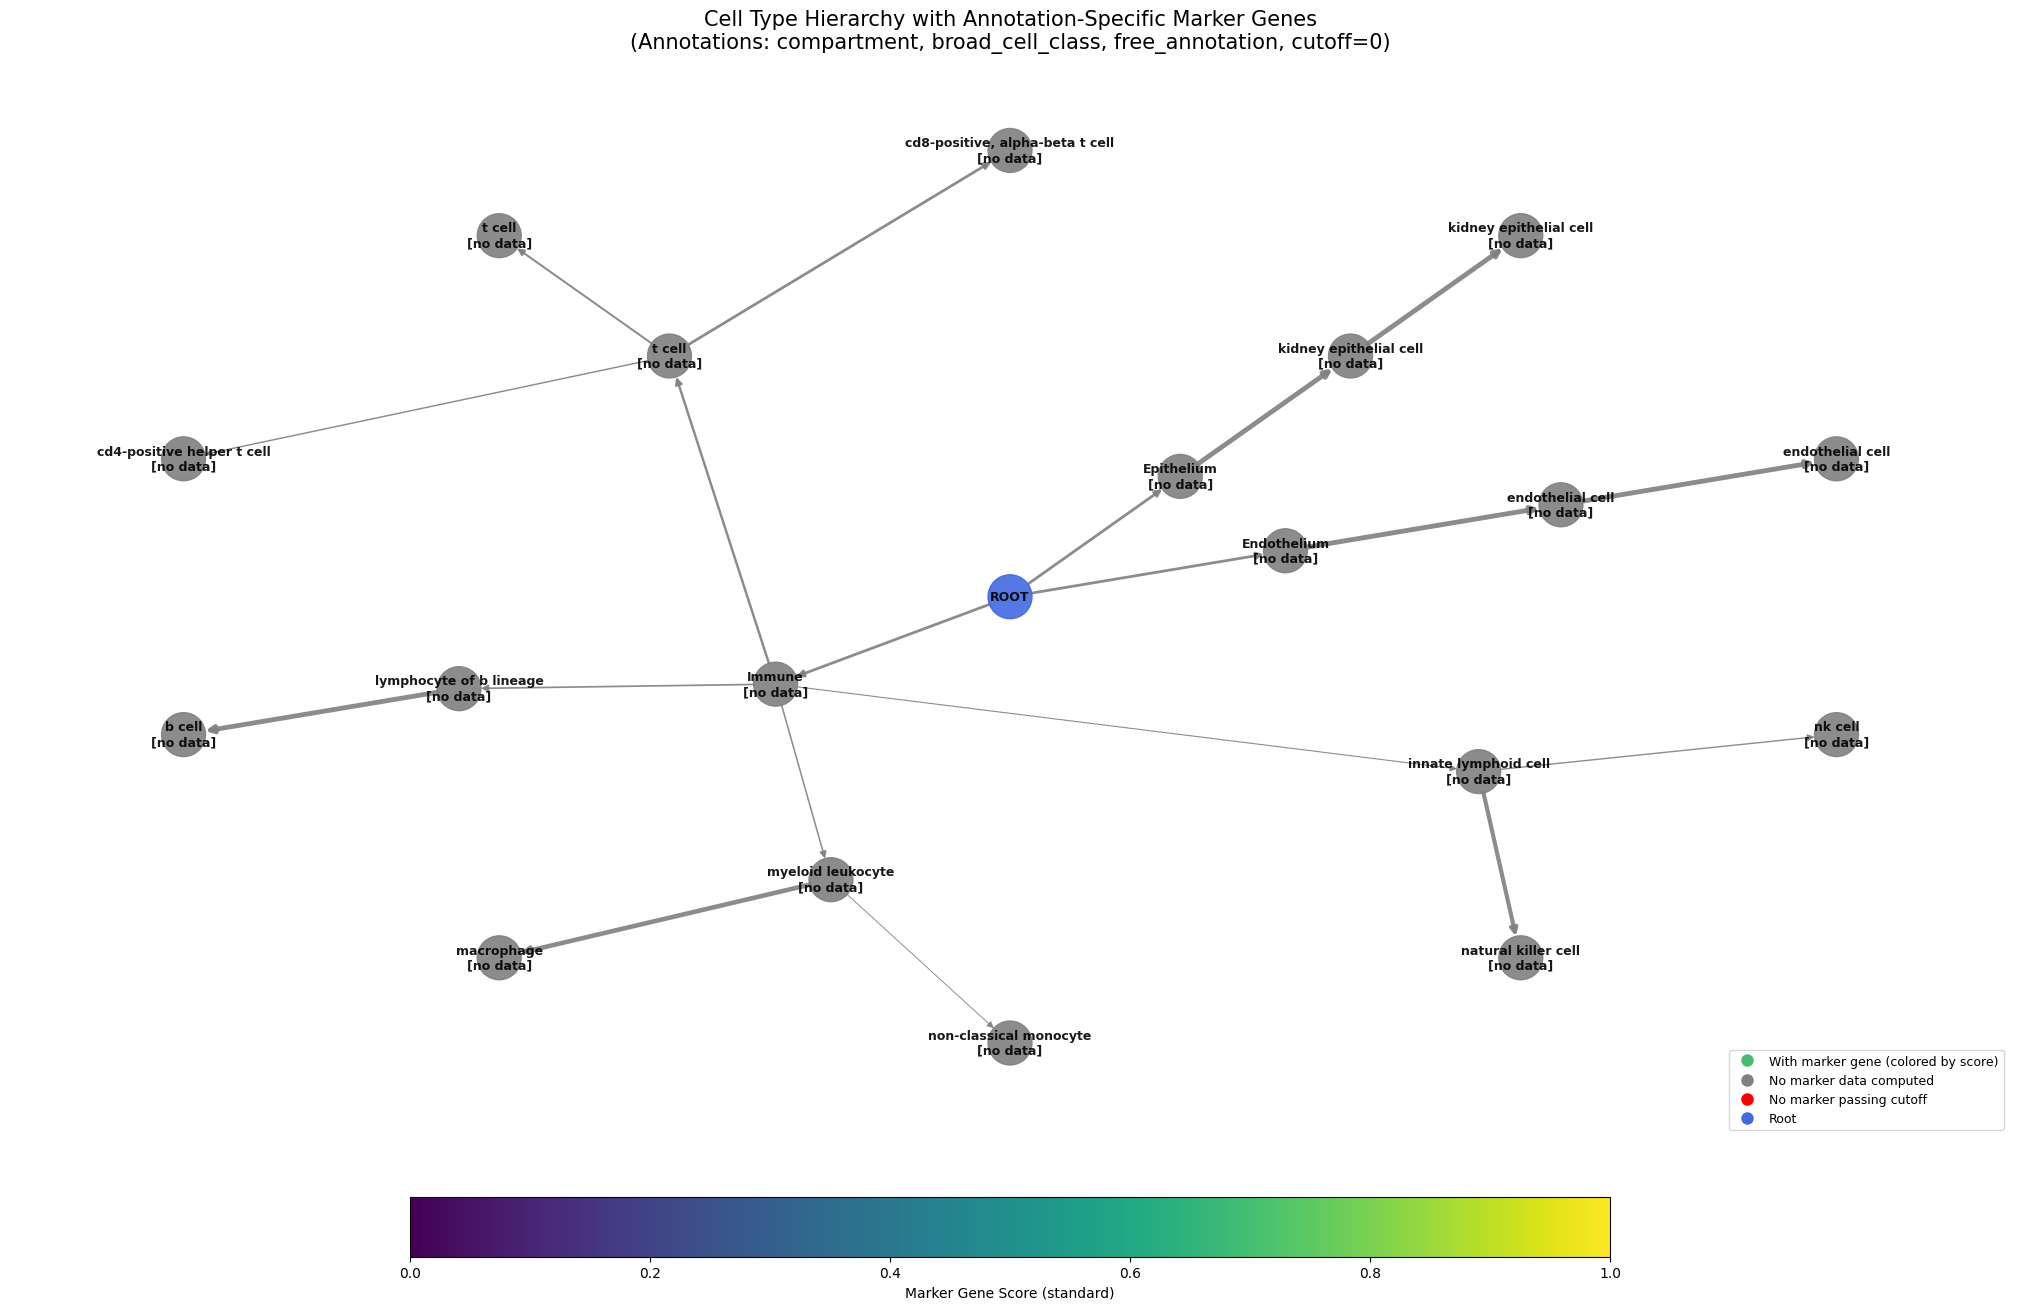

In [55]:
fig = scherlock.visualize_hierarchy_marker(cutoff=0)

## Basic plotting 

2025-04-22 13:37:33,049 - ScSherlock - INFO - Plotting 10 genes for 10 cell types using empiric model


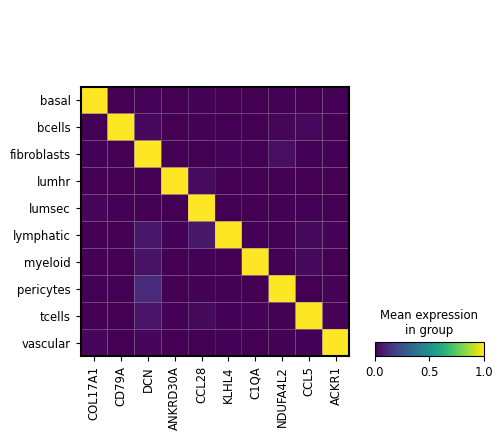

2025-04-22 13:37:35,672 - ScSherlock - INFO - Plotting 37 genes for 39 cell types using empiric model


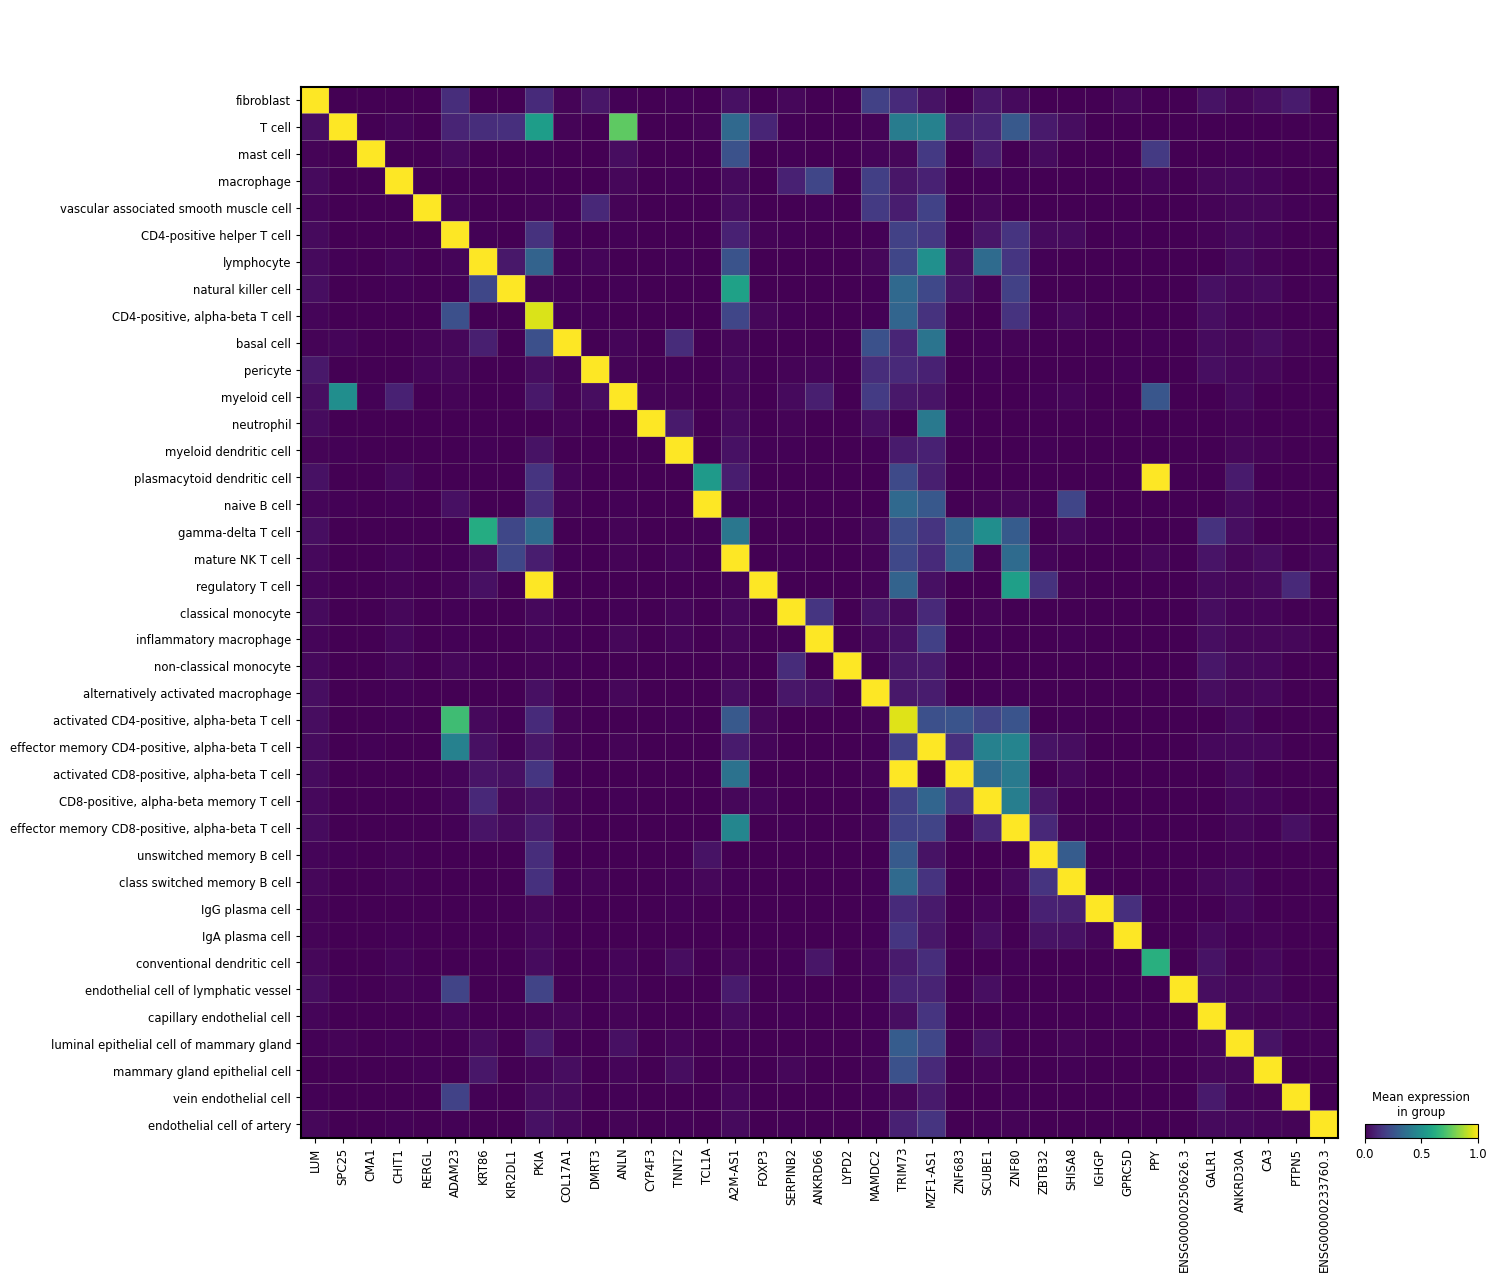

2025-04-22 13:37:38,731 - ScSherlock - INFO - Plotting 52 genes for 58 cell types using empiric model


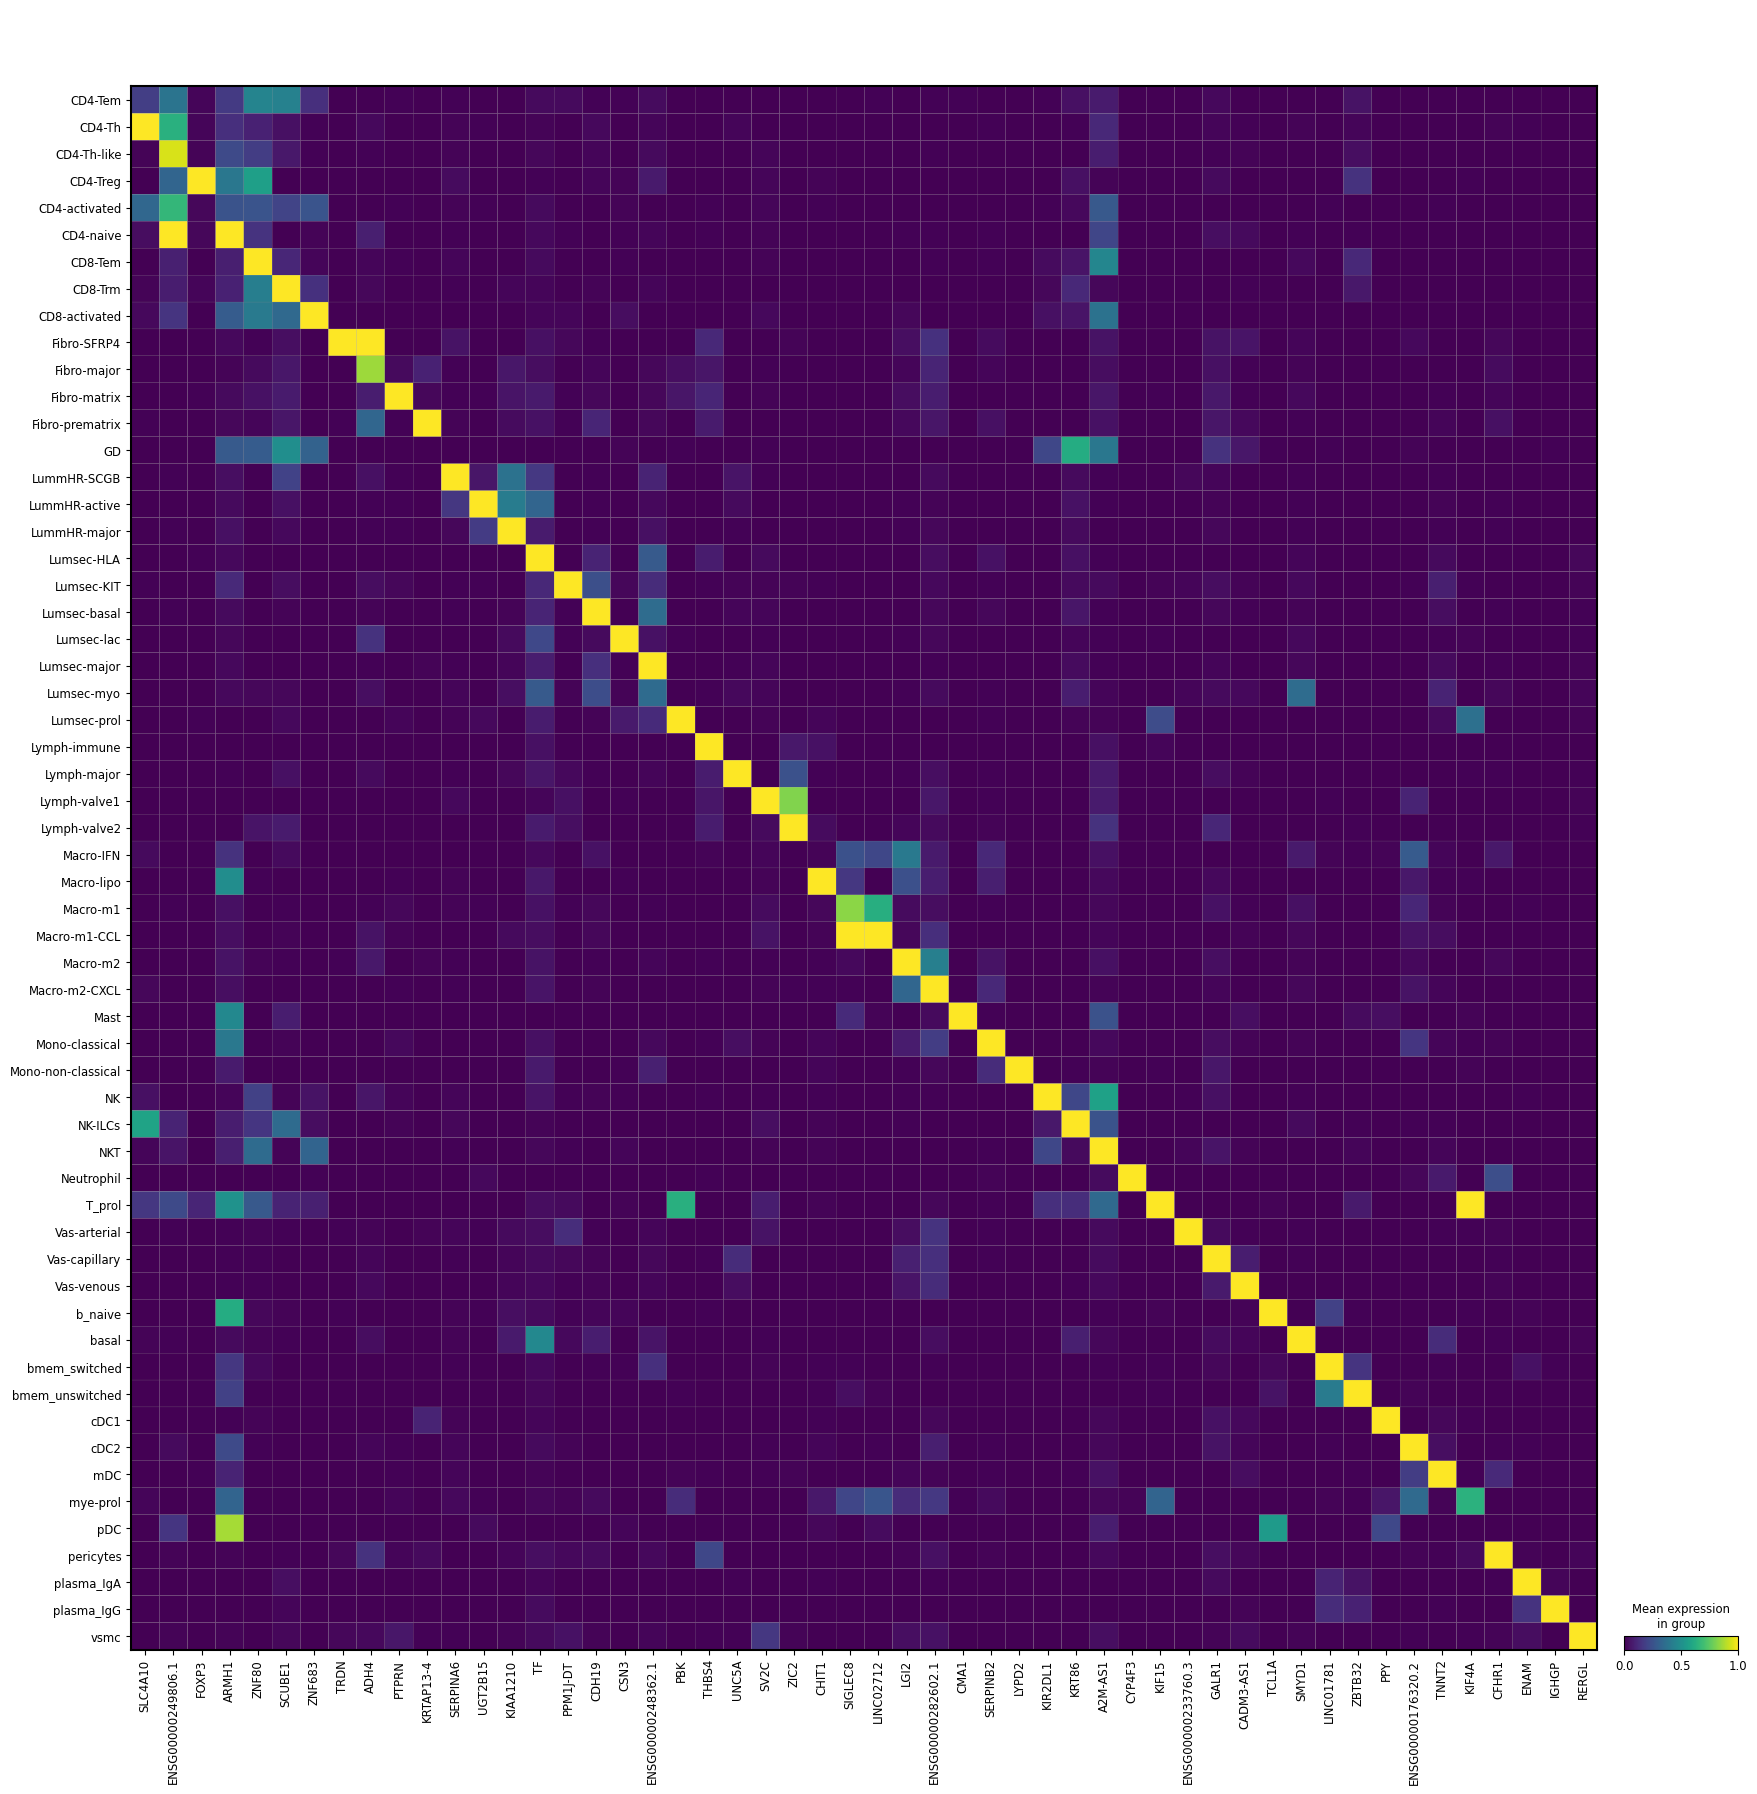

In [10]:
for annot in annotation:
    scherlock.plot_marker_heatmap(n_genes=1, column_ctype=annot,  cutoff=0,remove_ctype_no_marker=False)

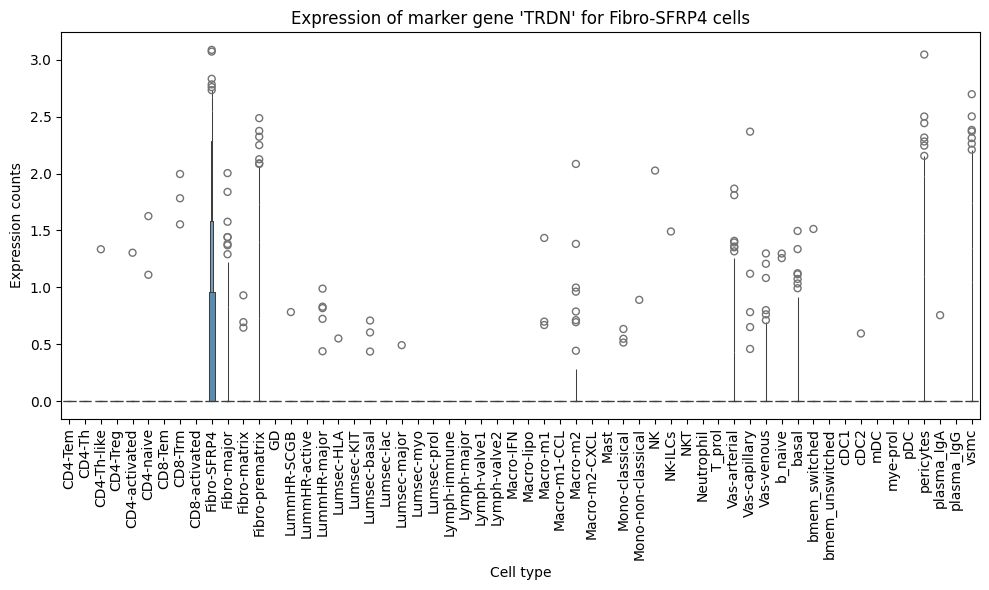

In [16]:
scherlock.visualize_marker(gene="TRDN",column_ctype='author_cell_type')

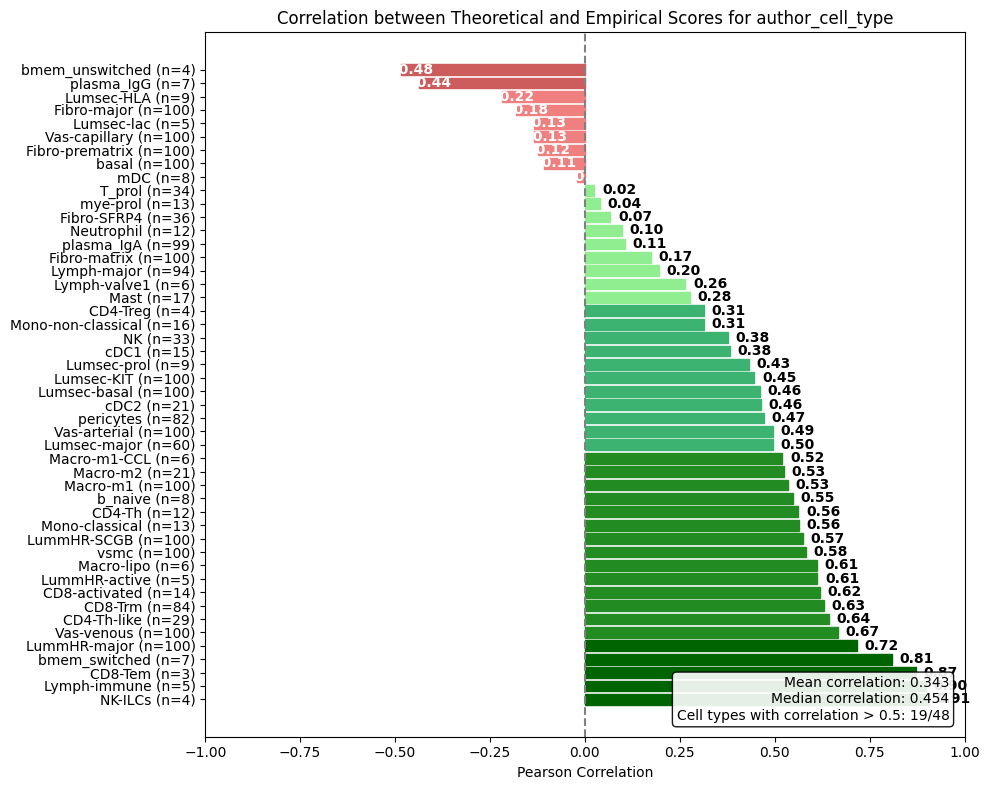

In [ ]:
fig = scherlock.plot_corr_theoric_empiric(min_genes=3, column_ctype="author_cell_type")

## Exporting results 

In [1]:
ctype = 'CD14 Mono'
scherlock.get_scores('CD14 Mono', method='empiric')[ctype]

NameError: name 'scherlock' is not defined

# Kumar atlas

In [3]:
# Load the data
adata = sc.read_h5ad("/home/croizer/Downloads/kumar_breast_atlas.h5ad")

In [4]:
cell_type_column = "level2"
patient_column = "donor_id"
adata.var_names = adata.var['feature_name'].values
annotation = ['level0', 'level1', 'level2']

In [5]:
# Create configuration
config = sh.ScSherlockConfig(
    k_values=[1, 10, 25],
    scoring_method=sh.ScoringMethod.DIFF,
    aggregation_method=sh.AggregationMethod.MEAN,
    max_genes_kept=100,
    min_patients=3,
    min_reads=10,
    sparse_step=5,
    n_jobs=-1
)

# Initialize SCherlock
scherlock = sh.ScSherlock(
    adata=adata,
    column_patient=patient_column,
    config=config
)

2025-04-07 13:35:49,124 - ScSherlock - INFO - ScSherlock initialized with (803283, 34455) data matrix


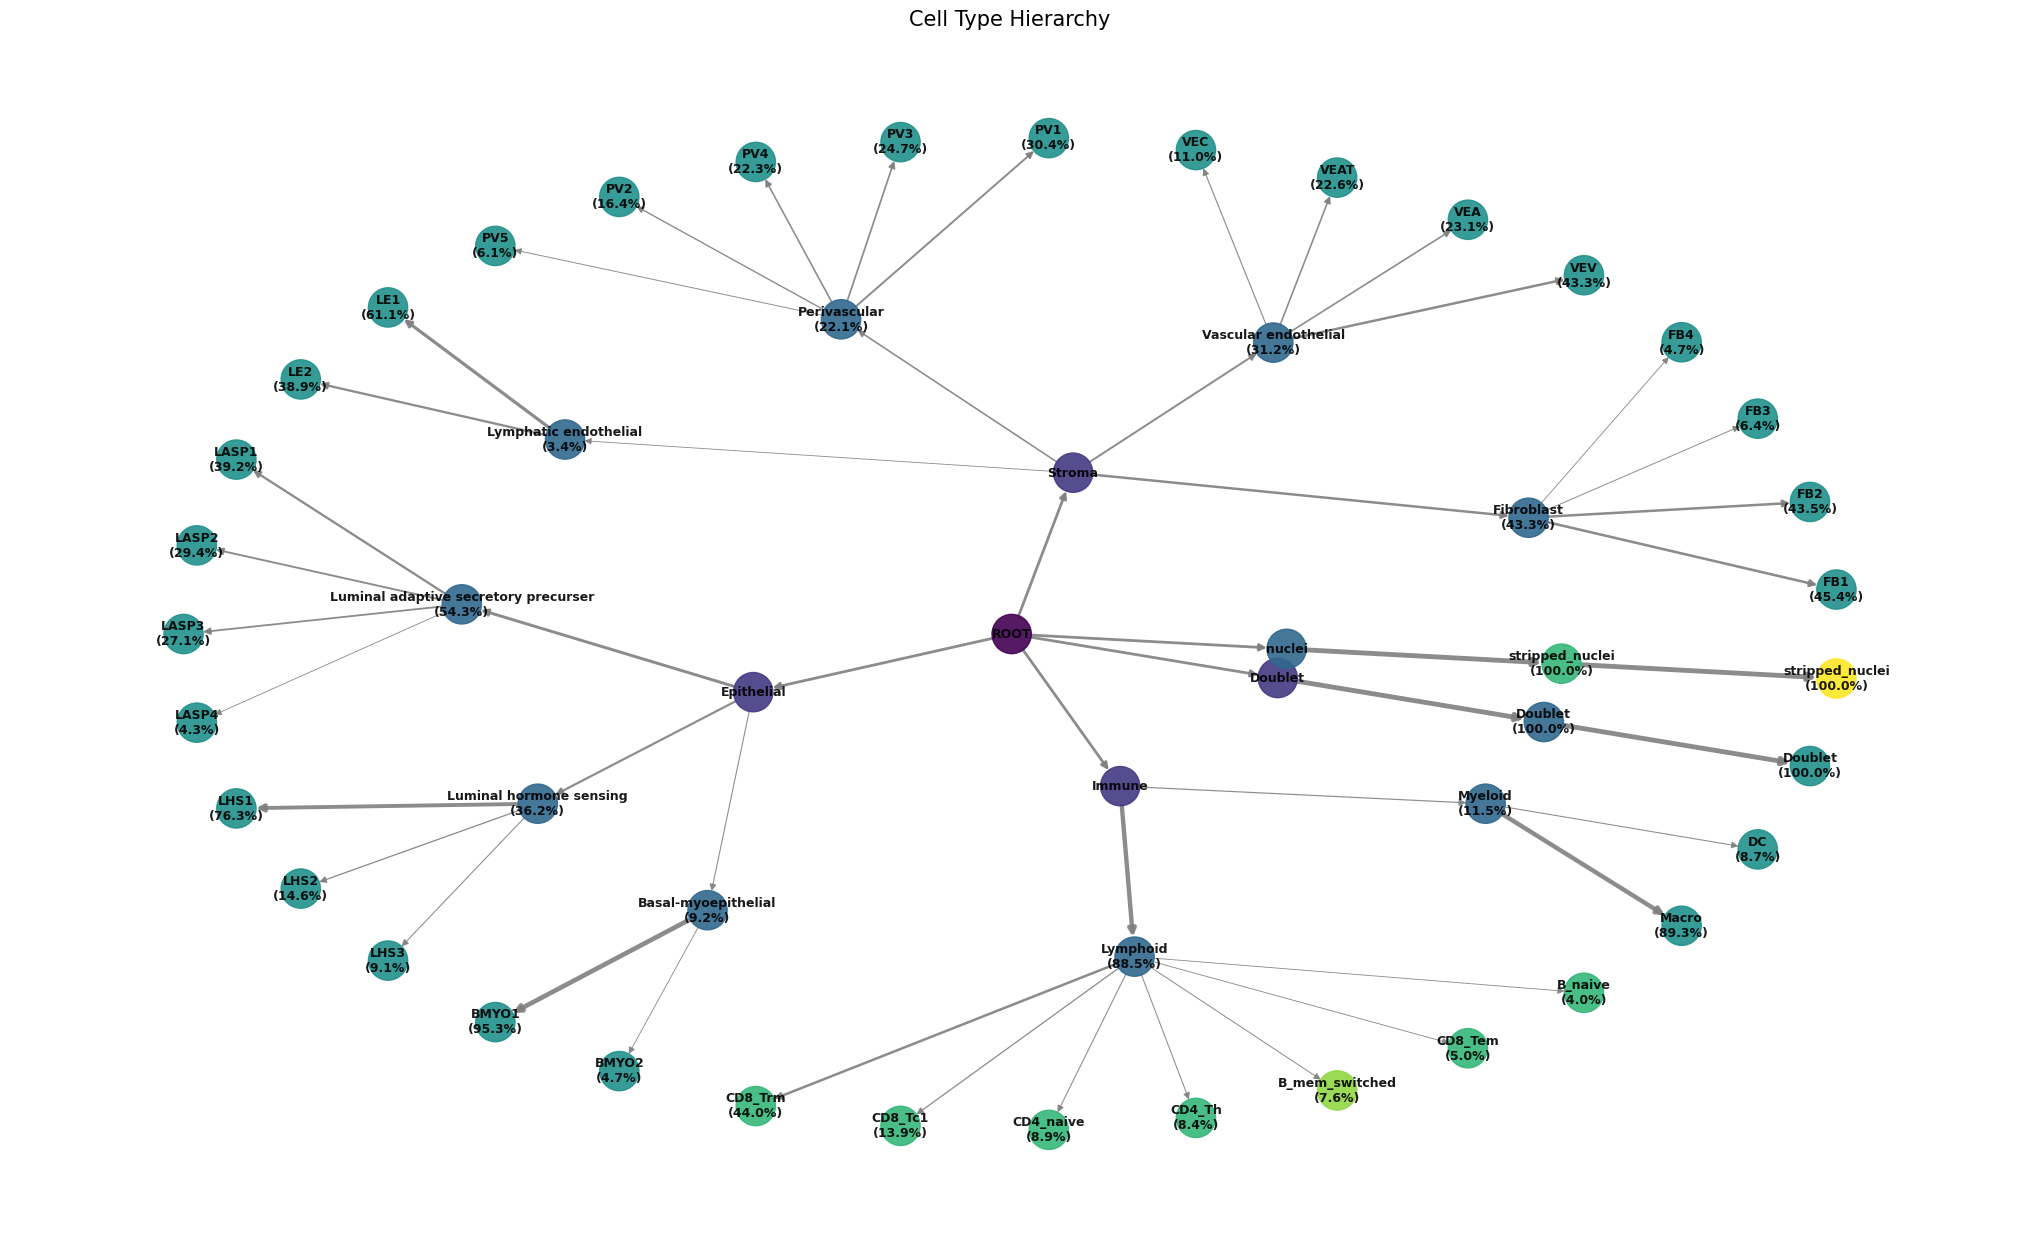

In [6]:
scherlock.create_hierarchy_graph(annotation,  min_proportion=0.03)
fig = scherlock.visualize_hierarchy()

In [7]:
for annot in annotation :
    scherlock.run(column_ctype=annot, method='empiric')


2025-04-07 13:36:06,432 - ScSherlock - INFO - Calculating theoretical scores for level0...
Aggregating Samples: 100%|██████████| 275/275 [00:03<00:00, 70.43it/s]
2025-04-07 13:36:14,141 - ScSherlock - INFO - Completed theoretical score calculation
2025-04-07 13:36:14,142 - ScSherlock - INFO - Applying multi-category correction...
2025-04-07 13:36:14,154 - ScSherlock - INFO - Aggregating scores...
2025-04-07 13:36:14,166 - ScSherlock - INFO - Sorting scores...
2025-04-07 13:36:14,239 - ScSherlock - INFO - Filtering genes...
Aggregating Samples: 100%|██████████| 275/275 [00:03<00:00, 70.46it/s]


0              donor_id_simplified::P1--level0::Doublet
1           donor_id_simplified::P1--level0::Epithelial
2               donor_id_simplified::P1--level0::Immune
3               donor_id_simplified::P1--level0::Stroma
4      donor_id_simplified::P1--level0::stripped_nuclei
                             ...                       
270            donor_id_simplified::P9--level0::Doublet
271         donor_id_simplified::P9--level0::Epithelial
272             donor_id_simplified::P9--level0::Immune
273             donor_id_simplified::P9--level0::Stroma
274    donor_id_simplified::P9--level0::stripped_nuclei
Name: SampleName, Length: 275, dtype: object


Aggregating Samples: 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]


Cell types in sorted_table: dict_keys(['Stroma', 'Epithelial', 'Immune', 'Doublet', 'stripped_nuclei'])
Cell types in ctype_n_patients: ['Doublet', 'Epithelial', 'Immune', 'Stroma', 'stripped_nuclei']


2025-04-07 13:36:23,520 - ScSherlock - INFO - Calculating empirical scores...
2025-04-07 13:36:52,329 - ScSherlock - INFO - Aggregating empirical scores...
2025-04-07 13:36:52,331 - ScSherlock - INFO - Sorting empirical scores...
2025-04-07 13:36:52,404 - ScSherlock - INFO - Identifying top markers...
2025-04-07 13:36:52,405 - ScSherlock - INFO - ScSherlock completed. Found markers for 5/5 cell types
2025-04-07 13:36:52,781 - ScSherlock - INFO - Calculating theoretical scores for level1...
Aggregating Samples: 100%|██████████| 715/715 [00:03<00:00, 208.34it/s]
2025-04-07 13:37:06,057 - ScSherlock - INFO - Completed theoretical score calculation
2025-04-07 13:37:06,058 - ScSherlock - INFO - Applying multi-category correction...
2025-04-07 13:37:06,103 - ScSherlock - INFO - Aggregating scores...
2025-04-07 13:37:06,142 - ScSherlock - INFO - Sorting scores...
2025-04-07 13:37:06,319 - ScSherlock - INFO - Filtering genes...
Aggregating Samples: 100%|██████████| 715/715 [00:03<00:00, 201.78

0      donor_id_simplified::P1--level1::Basal-myoepit...
1               donor_id_simplified::P1--level1::Doublet
2            donor_id_simplified::P1--level1::Fibroblast
3      donor_id_simplified::P1--level1::Luminal adapt...
4      donor_id_simplified::P1--level1::Luminal hormo...
                             ...                        
616            donor_id_simplified::P9--level1::Lymphoid
617             donor_id_simplified::P9--level1::Myeloid
618        donor_id_simplified::P9--level1::Perivascular
619    donor_id_simplified::P9--level1::Vascular endo...
620     donor_id_simplified::P9--level1::stripped_nuclei
Name: SampleName, Length: 621, dtype: object


Aggregating Samples: 100%|██████████| 13/13 [00:04<00:00,  3.24it/s]


Cell types in sorted_table: dict_keys(['Lymphatic endothelial', 'Luminal adaptive secretory precurser', 'Fibroblast', 'Luminal hormone sensing', 'Vascular endothelial', 'Lymphoid', 'Perivascular', 'Basal-myoepithelial', 'Doublet', 'DDC2', 'stripped_nuclei', 'Myeloid', 'DDC1'])
Cell types in ctype_n_patients: ['Basal-myoepithelial', 'DDC1', 'DDC2', 'Doublet', 'Fibroblast', 'Luminal adaptive secretory precurser', 'Luminal hormone sensing', 'Lymphatic endothelial', 'Lymphoid', 'Myeloid', 'Perivascular', 'Vascular endothelial', 'stripped_nuclei']


2025-04-07 13:37:15,956 - ScSherlock - INFO - Calculating empirical scores...
2025-04-07 13:37:57,567 - ScSherlock - INFO - Aggregating empirical scores...
2025-04-07 13:37:57,570 - ScSherlock - INFO - Sorting empirical scores...
2025-04-07 13:37:57,794 - ScSherlock - INFO - Identifying top markers...
2025-04-07 13:37:57,796 - ScSherlock - INFO - ScSherlock completed. Found markers for 11/13 cell types
2025-04-07 13:37:59,191 - ScSherlock - INFO - Calculating theoretical scores for level2...
Aggregating Samples: 100%|██████████| 2420/2420 [00:05<00:00, 472.56it/s]
2025-04-07 13:38:36,444 - ScSherlock - INFO - Completed theoretical score calculation
2025-04-07 13:38:36,446 - ScSherlock - INFO - Applying multi-category correction...
2025-04-07 13:38:36,583 - ScSherlock - INFO - Aggregating scores...
2025-04-07 13:38:36,711 - ScSherlock - INFO - Sorting scores...
2025-04-07 13:38:37,322 - ScSherlock - INFO - Filtering genes...
Aggregating Samples: 100%|██████████| 2420/2420 [00:03<00:00, 

0                  donor_id_simplified::P1--level2::BMYO1
1                  donor_id_simplified::P1--level2::BMYO2
2         donor_id_simplified::P1--level2::B_mem_switched
3       donor_id_simplified::P1--level2::B_mem_unswitched
4                donor_id_simplified::P1--level2::B_naive
                              ...                        
2036                 donor_id_simplified::P9--level2::VEA
2037                donor_id_simplified::P9--level2::VEAT
2038                 donor_id_simplified::P9--level2::VEC
2039                 donor_id_simplified::P9--level2::VEV
2040     donor_id_simplified::P9--level2::stripped_nuclei
Name: SampleName, Length: 2041, dtype: object


Aggregating Samples: 100%|██████████| 44/44 [00:03<00:00, 11.05it/s]


Cell types in sorted_table: dict_keys(['LE1', 'LASP3', 'FB1', 'LHS1', 'VEAT', 'CD8_Trm', 'VEA', 'PV4', 'PV5', 'BMYO1', 'FB2', 'LASP2', 'VEC', 'LASP1', 'Doublet', 'PV3', 'LASP5', 'VEV', 'LHS2', 'LE2', 'FB4', 'PV1', 'PV2', 'FB3', 'DDC2', 'CD4_naive', 'LASP4', 'stripped_nuclei', 'CD8_Tc1', 'B_mem_switched', 'LHS3', 'Macro', 'CD4_Th', 'Plasma_cell', 'CD8_Tem', 'B_naive', 'BMYO2', 'DDC1', 'NK', 'ILC', 'B_mem_unswitched', 'DC', 'NKT', 'Macro-lipo'])
Cell types in ctype_n_patients: ['BMYO1', 'BMYO2', 'B_mem_switched', 'B_mem_unswitched', 'B_naive', 'CD4_Th', 'CD4_naive', 'CD8_Tc1', 'CD8_Tem', 'CD8_Trm', 'DC', 'DDC1', 'DDC2', 'Doublet', 'FB1', 'FB2', 'FB3', 'FB4', 'ILC', 'LASP1', 'LASP2', 'LASP3', 'LASP4', 'LASP5', 'LE1', 'LE2', 'LHS1', 'LHS2', 'LHS3', 'Macro', 'Macro-lipo', 'NK', 'NKT', 'PV1', 'PV2', 'PV3', 'PV4', 'PV5', 'Plasma_cell', 'VEA', 'VEAT', 'VEC', 'VEV', 'stripped_nuclei']


2025-04-07 13:38:48,484 - ScSherlock - INFO - Calculating empirical scores...
2025-04-07 13:41:08,255 - ScSherlock - INFO - Aggregating empirical scores...
2025-04-07 13:41:08,262 - ScSherlock - INFO - Sorting empirical scores...
2025-04-07 13:41:08,888 - ScSherlock - INFO - Identifying top markers...
2025-04-07 13:41:08,889 - ScSherlock - INFO - ScSherlock completed. Found markers for 32/44 cell types


2025-04-07 13:41:09,915 - ScSherlock - INFO - Found empirical marker scores for level0
2025-04-07 13:41:09,917 - ScSherlock - INFO - Found empirical marker scores for level1
2025-04-07 13:41:09,917 - ScSherlock - INFO - Found empirical marker scores for level2


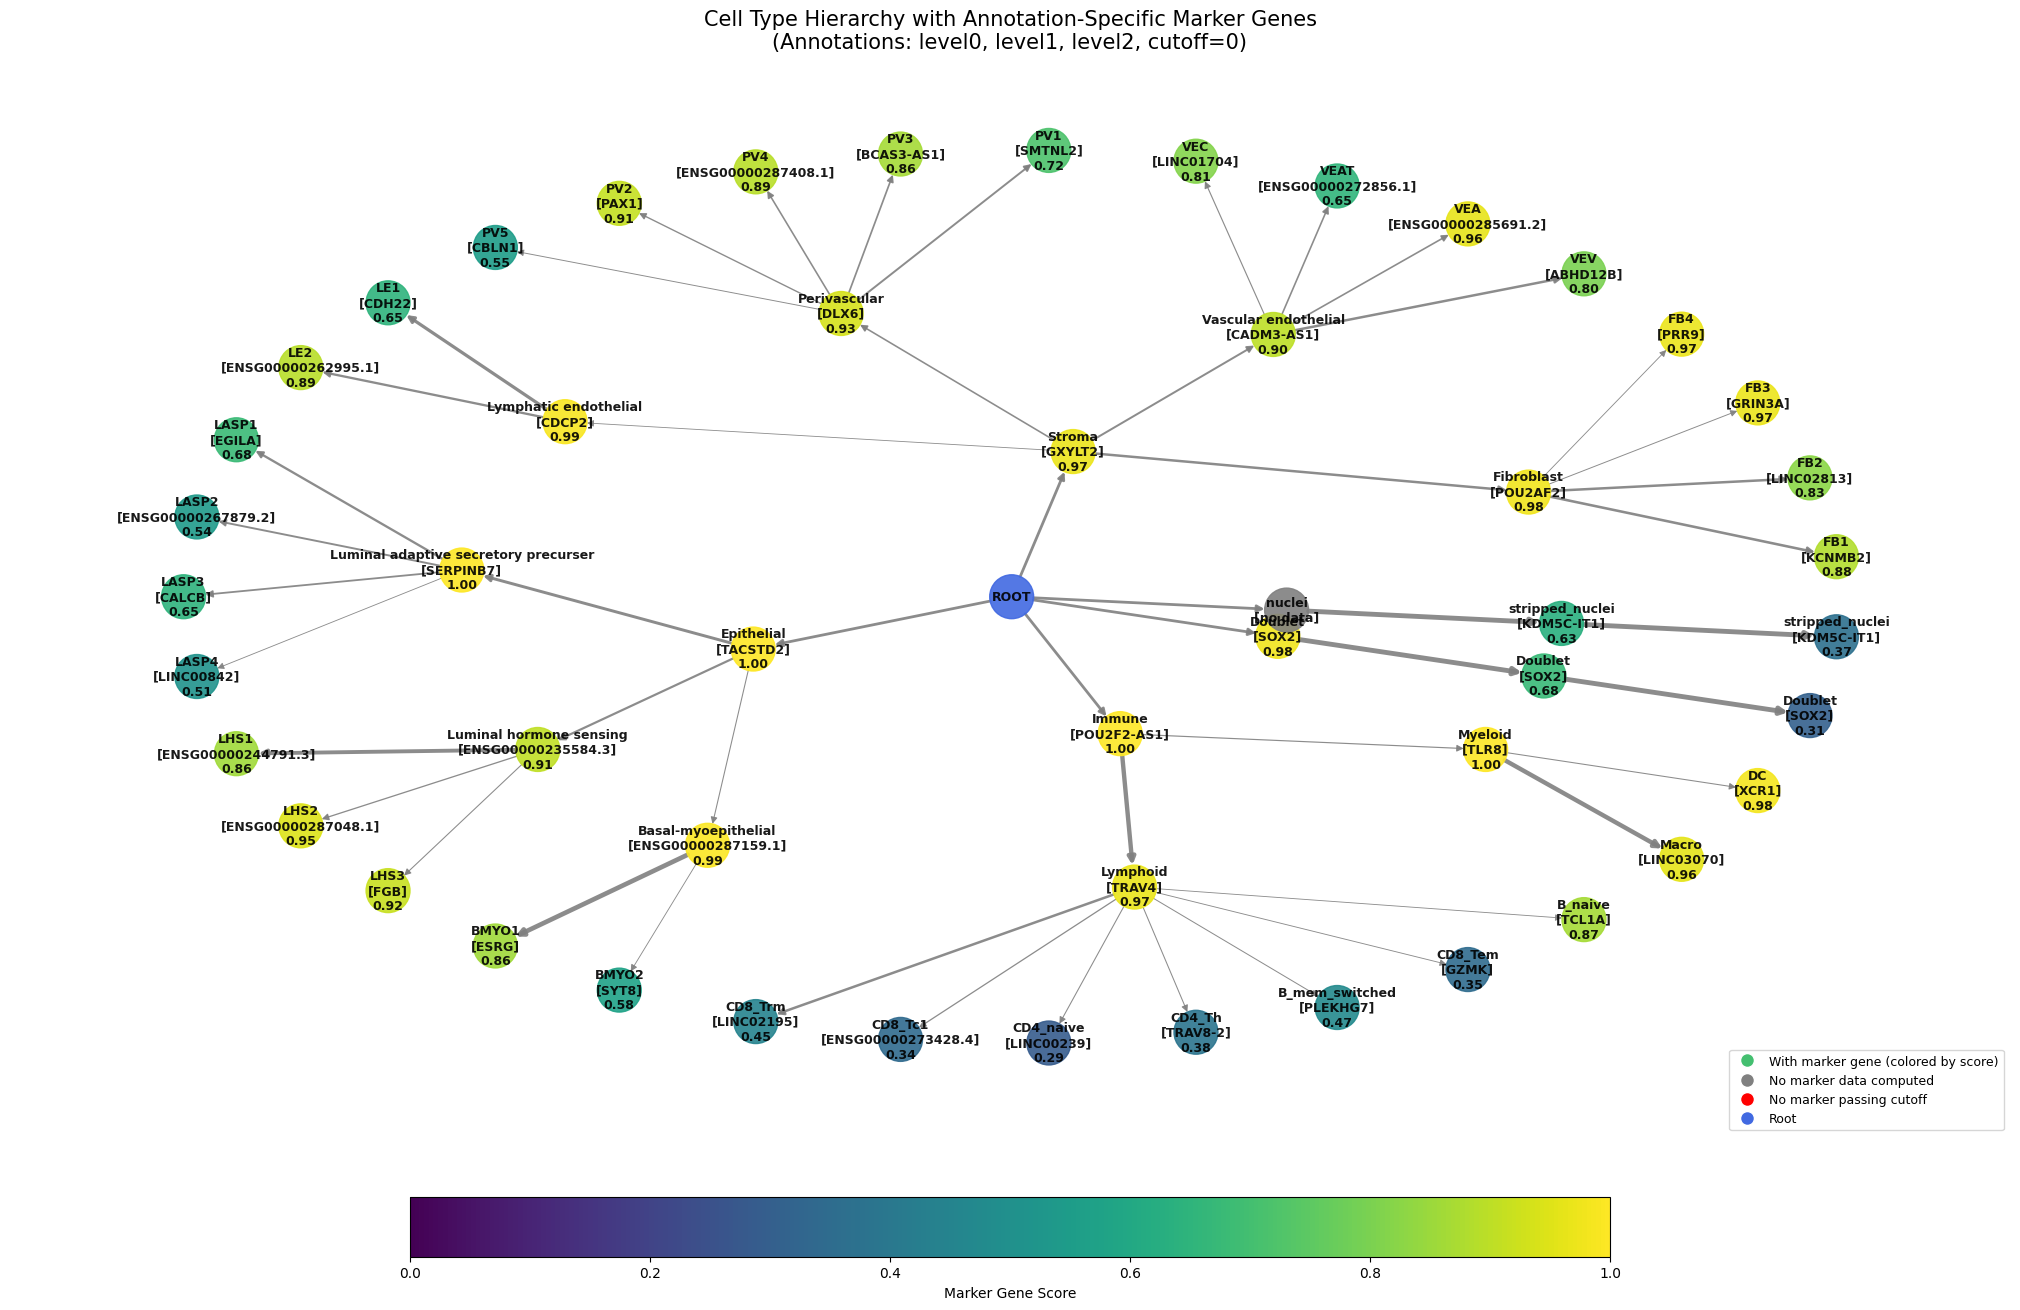

In [8]:
fig = scherlock.visualize_hierarchy_marker(cutoff=0)

In [ ]:
for annot in annotation:
    scherlock.plot_marker_heatmap(n_genes=1, column_ctype=annot,  cutoff=0,remove_ctype_no_marker=True)

2025-04-07 13:41:16,037 - ScSherlock - INFO - Plotting 5 genes for 5 cell types using empiric model
